<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/HW2/CentralLimitTheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total),
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For distribution plot the sample mean of each sample (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
-  Extra Credit (required for 661 students): FIT a gaussian to the distribution of means. i.e. to the height of the bins if a histogram of sample means           

In [282]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize

%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['norm', 'std']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [283]:
import numpy as np
np.__version__

'1.23.5'

## choose which distributions to use

In [284]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which *population* mean to give it (it will be the same for each distribution)

In [285]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this!

![1](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq1.png)

![2](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq2.png)

For chi2 the parameter is *k* degrees of freedom. the mean is mean=*k*, the variance is 2*k*

# Then lets look at the numpy random sampling package to see how I create the distribution
https://numpy.org/doc/stable/reference/random/index.html#module-numpy.random
https://numpy.org/doc/stable/reference/random/generated/numpy.random.chisquare.html

In class aI used scipy.stats. You are free to use what you want!



In [286]:
# the chi sq distribution takes the number of degrees of freedom,
# which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful! But youn can do this however you want

Lets start by looking at a single chi sq distribution of 100 elements

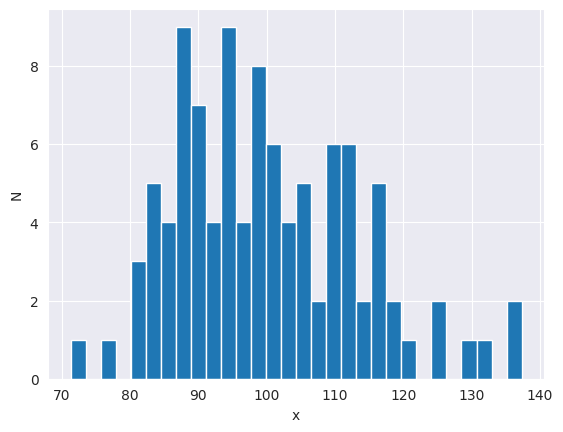

In [287]:
# Note: I am adding imports here, to show the workflow:
# at this point I realize what packages I need and I import them.
# but this is a PEP8 violation.
# It is a good habit to put the includes at the top
# so the code fails right away if the packages are missing.
# Otherwise a user may have a piece of code running for a long time,
# and then fail when the package cannot be imported...
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456) #WHY DO I DO THIS??
# prepare a container for all the distribution:
# a dictionary so you can call each family of distribution by "key"
mydists = {}
# mydists is an empty disctionary;
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['chisq'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['chisq'][100] = np.random.chisquare(mymean, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it:
#             an array of 100 elements by the key 100
pl.hist(mydists['chisq'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square

---

distribution with  100 degrees of freedom.

## let numpy calculate what the mean and stdev of this distribution are

In [288]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(mydists['chisq'][100].mean(), mydists['chisq'][100].std()))

Chisq mean: 100.09, standard deviation: 13.24


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000 - note that generally size > 30 is considered necessary for the theorem to hold). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we discussed in class). Here are some tricks to create the distribution sizes. But you do not lave to do it like this. You do you, just make it work.

In [289]:
# mysize = (np.random.rand(100) * 1000).astype(int)
# mysize = (2000 / (np.array(range(1, 101)))).astype(int)
# mysize = (1000 / (np.array(np.arange(1, 101) + [10]))).astype(int)
# mysize = (np.logspace(1, 4.3, 100, base=10)).astype(int)
mysize=np.linspace(10,2000,100).astype(int)

print ("shape of the 'size' list that contains the size of each distribution",
       mysize.shape)
print(mysize)

shape of the 'size' list that contains the size of each distribution (100,)
[  10   30   50   70   90  110  130  150  170  190  211  231  251  271
  291  311  331  351  371  391  412  432  452  472  492  512  532  552
  572  592  613  633  653  673  693  713  733  753  773  793  814  834
  854  874  894  914  934  954  974  994 1015 1035 1055 1075 1095 1115
 1135 1155 1175 1195 1216 1236 1256 1276 1296 1316 1336 1356 1376 1396
 1417 1437 1457 1477 1497 1517 1537 1557 1577 1597 1618 1638 1658 1678
 1698 1718 1738 1758 1778 1798 1819 1839 1859 1879 1899 1919 1939 1959
 1979 2000]


Text(0, 0.5, 'frequency')

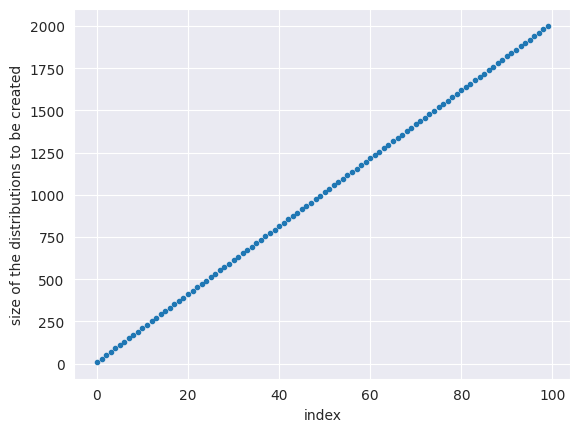

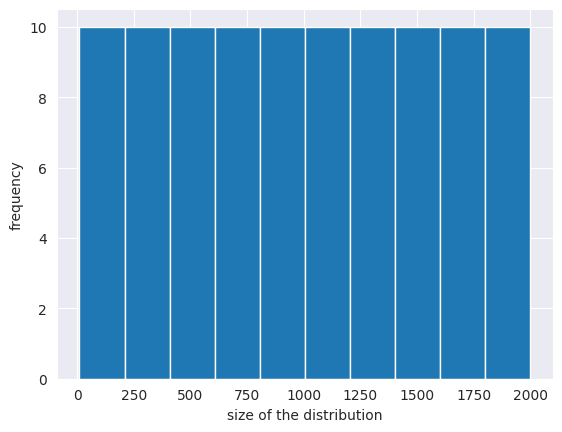

In [290]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

pl.figure()
pl.hist(mysize)
pl.xlabel("size of the distribution")
pl.ylabel("frequency")


Figure 2: scatter plot and distribution of sample sizes for 100 samples to be created (note, the current choice does not produce more small then large distribution, which is desirable)

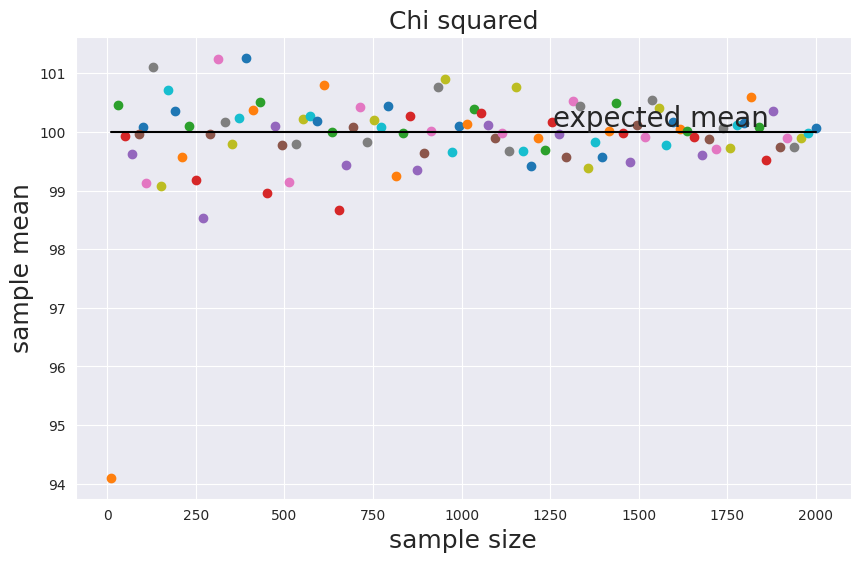

In [291]:

# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:
    mydists['chisq'][n] = np.random.chisquare(df, size = n) #all distributions have mean=df=100

# save the means for plotting later

mydists['chisq']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['chisq']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['chisq']['means'][nn] = mydists['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Chi squared', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

### Figure 2: Scatter plot of sample mean for different sample sizes. As the number of size increases, the mean of sample gets closer to the mean of the population. The standard deviation roughly goes as $1/\sqrt{N}$. As sample size increases, the mean converges to the average of the population.

# now the histogram of the mean of all samples:
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

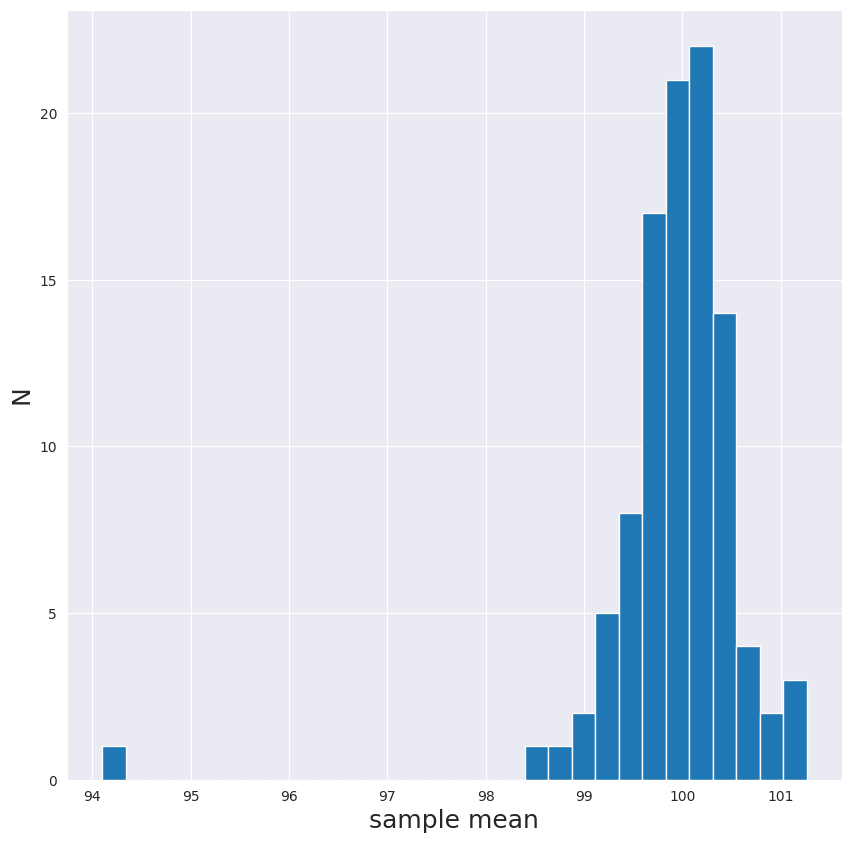

In [292]:
allmeans = list(mydists['chisq']['means'].values())
allmeans=np.array(allmeans)
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

## Figure 3: Histogram of sample means.

# <mark>WFF</mark> This is a concise description of the plot, but it does not tell someone why this plot is important. For this plot, this demonstrates the central limit theorem because it shows how that the sample means are gaussian distributed around the population mean.

# Do it for the Normal distribution


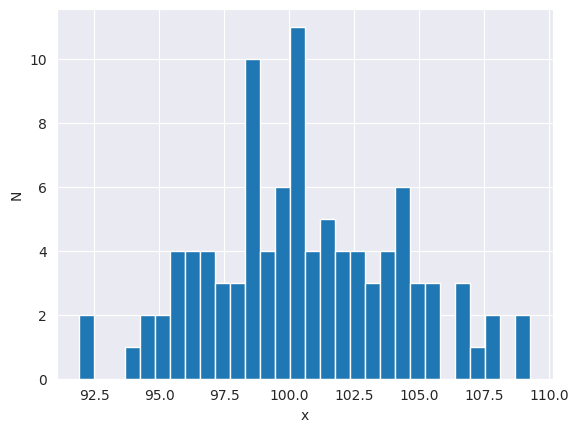

In [293]:
np.random.seed(456)
mydists['normal'] = {}
mydists['normal'][100] = np.random.normal(loc=mymean, scale=4, size=100)
pl.hist(mydists['normal'][100], bins = 30)
pl.ylabel('N');
pl.xlabel('x');

### Figure 1: Normal distribution of a sample of size 100 with mean 100 and standard deviation 4.

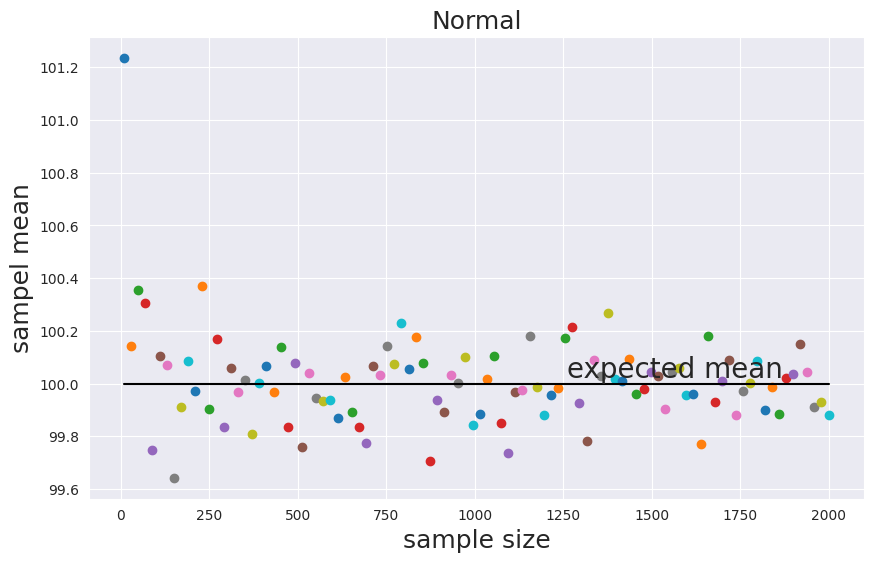

In [294]:
##your code here...
np.random.seed(456)
mydists['normal']={}
for n in mysize:
  mydists['normal'][n]=np.random.normal(loc=mymean, scale=4, size=n)
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
mydists['normal']['means']={}
for nn in mysize:
  if not type(nn) == str:
    mydists['normal']['means'][nn]=mydists['normal'][nn].mean();
    axnormal_mu_n.plot(nn,mydists['normal']['means'][nn],'o');
axnormal_mu_n.set_xlabel("sample size",fontsize=18)
axnormal_mu_n.set_ylabel("sampel mean",fontsize=18)
axnormal_mu_n.set_title('Normal', fontsize=18)
axnormal_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axnormal_mu_n.text(axnormal_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

### Figure 2: Scatter plot of sample mean for different sample sizes. The mean of sample gets closer to expected mean as sample size increases.

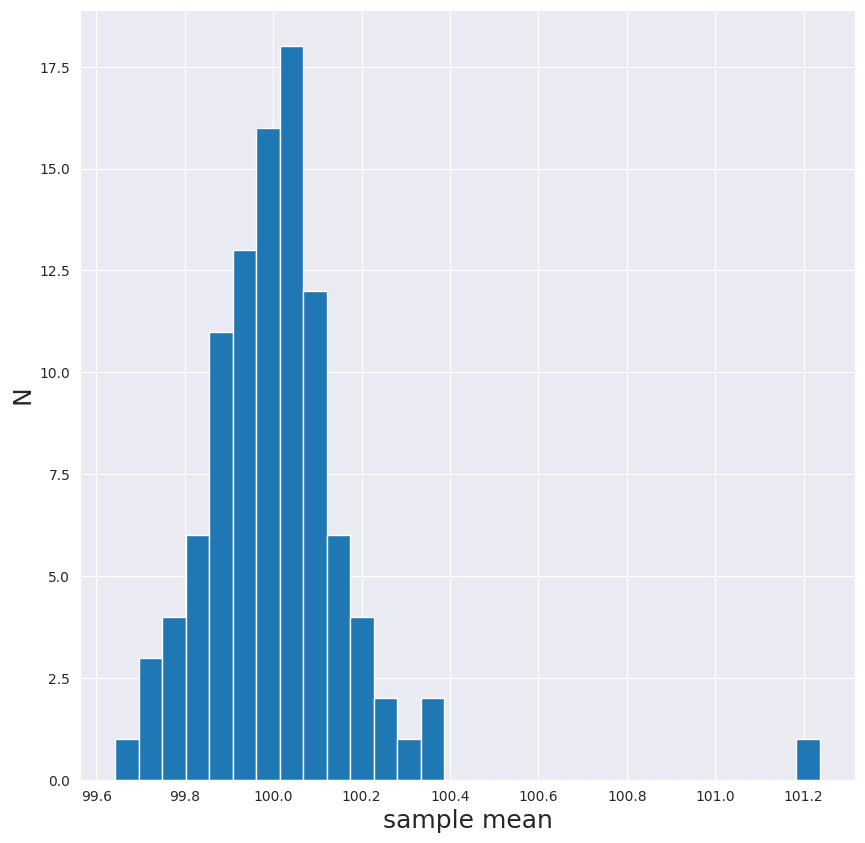

In [295]:
allmeans = list(mydists['normal']['means'].values())
allmeans=np.array(allmeans)
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

## Figure 3: Histogram of sample means.

# Do it for the Poisson distribution

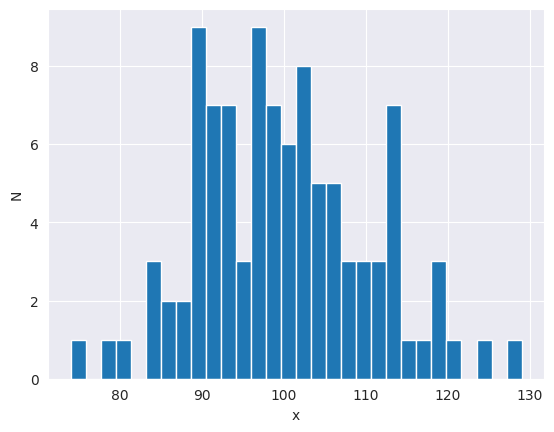

In [296]:
np.random.seed(456)
mydists['pois'] = {}
mydists['pois'][100] = np.random.poisson(lam=mymean, size=100)
pl.hist(mydists['pois'][100], bins = 30)
pl.ylabel('N');
pl.xlabel('x');

## Figure 1: Histogram of Poisson distribution with size rambda of 100 and size 100.

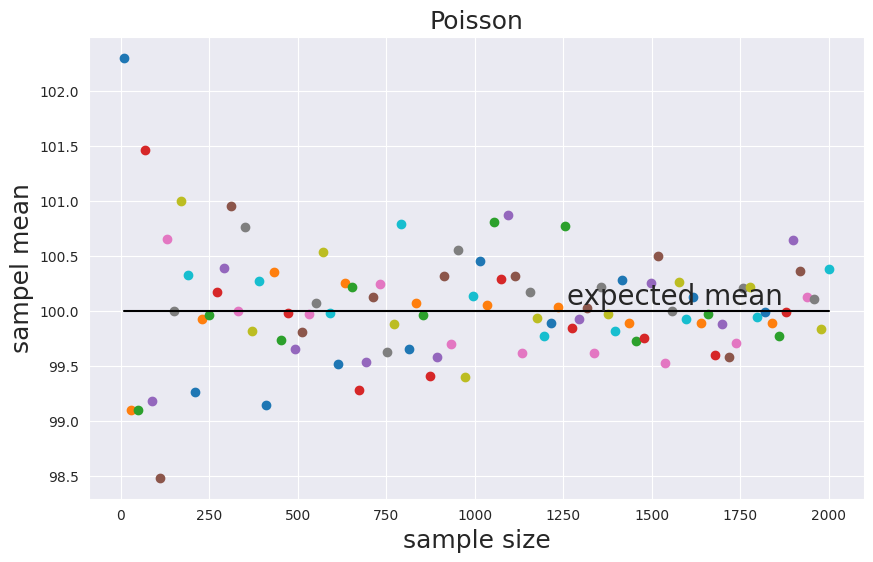

In [297]:
##your code here...
np.random.seed(456)
mydists['pois']={}
for n in mysize:
  mydists['pois'][n]=np.random.poisson(lam=mymean, size=n)
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
mydists['pois']['means']={}
for nn in mysize:
  mydists['pois']['means'][nn]=mydists['pois'][nn].mean();
  axpois_mu_n.plot(nn,mydists['pois']['means'][nn],'o');
axpois_mu_n.set_xlabel("sample size",fontsize=18)
axpois_mu_n.set_ylabel("sampel mean",fontsize=18)
axpois_mu_n.set_title('Poisson', fontsize=18)
axpois_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axpois_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

### Figure 2: Scatter plot of the sample mean vs. sample size. The sample mean gets closer to expected mean as sample size increases.

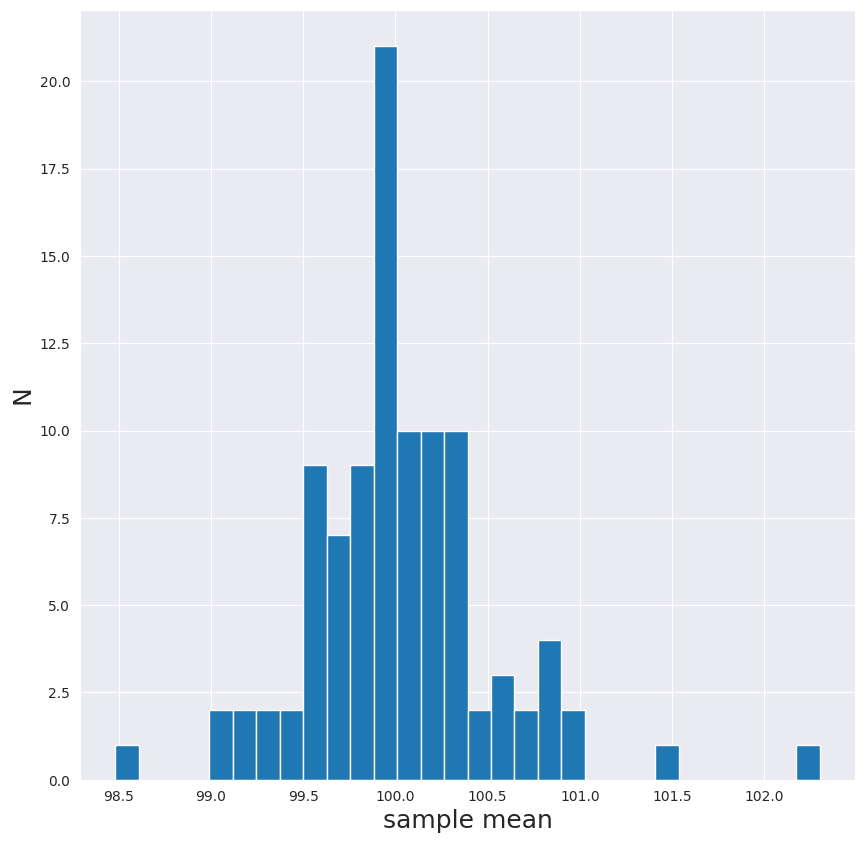

In [298]:
allmeans = list(mydists['pois']['means'].values())
allmeans=np.array(allmeans)
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

### Figure 3: Histogram of sample mean.

# Do it for the Binomial distribution

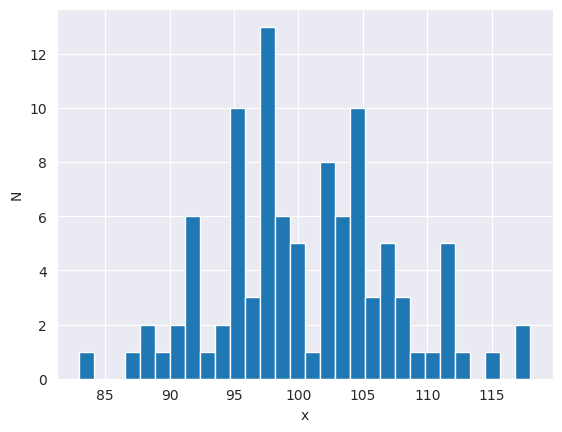

In [299]:
np.random.seed(456)
mydists['binomial'] = {}
mydists['binomial'][100] = np.random.binomial(n=200,p=0.5, size=100)
pl.hist(mydists['binomial'][100], bins = 30)
pl.ylabel('N');
pl.xlabel('x');

## Figure 1: Histogram of binomial distribution with n=200, p=0.5 and size=100.

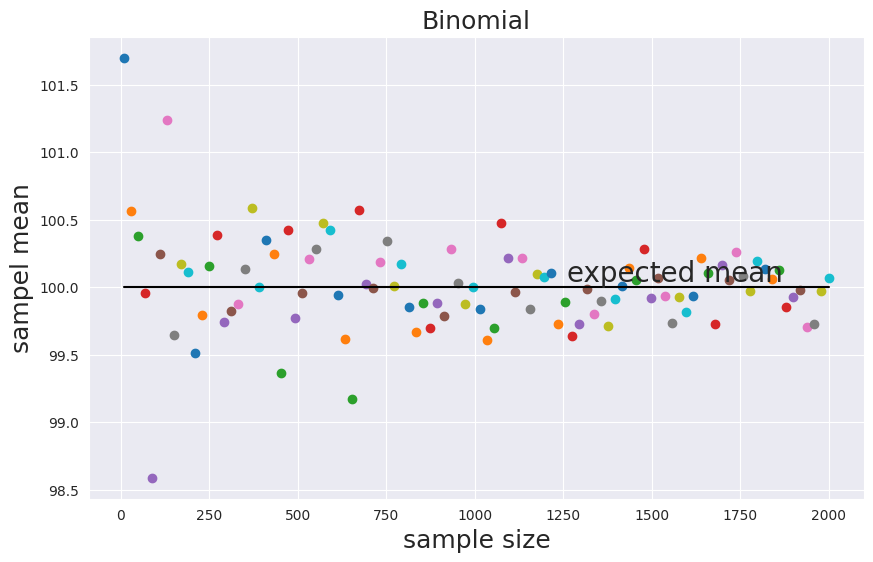

In [300]:
##your code here...
np.random.seed(456)
mydists['binomial']={}
for n in mysize:
  mydists['binomial'][n]=np.random.binomial(n=200,p=0.5, size=n)
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
mydists['binomial']['means']={}
for nn in mysize:
  mydists['binomial']['means'][nn]=mydists['binomial'][nn].mean();
  axbinomial_mu_n.plot(nn,mydists['binomial']['means'][nn],'o');
axbinomial_mu_n.set_xlabel("sample size",fontsize=18)
axbinomial_mu_n.set_ylabel("sampel mean",fontsize=18)
axbinomial_mu_n.set_title('Binomial', fontsize=18)
axbinomial_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axbinomial_mu_n.text(axbinomial_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

### Figure 2: Scatter plot of the sample mean vs. sample size. The sample mean gets closer to expected mean as sample size increases.

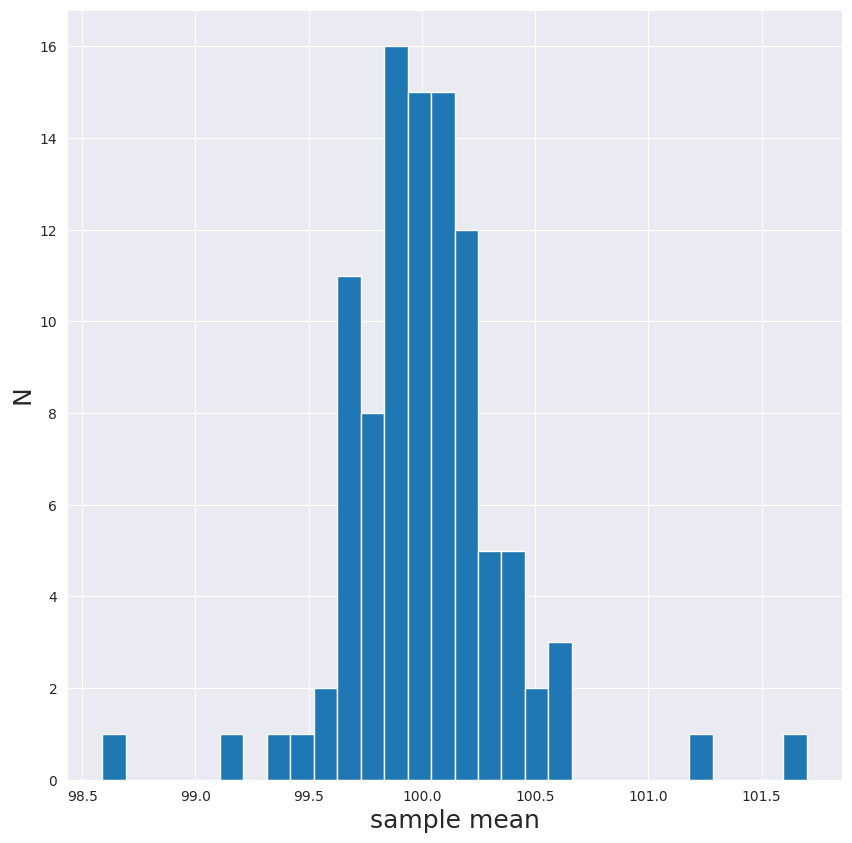

In [301]:
allmeans = list(mydists['binomial']['means'].values())
allmeans=np.array(allmeans)
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

### Figure 3: Histogram of sample mean.

# Do it for another distribution
I chose Cauchy

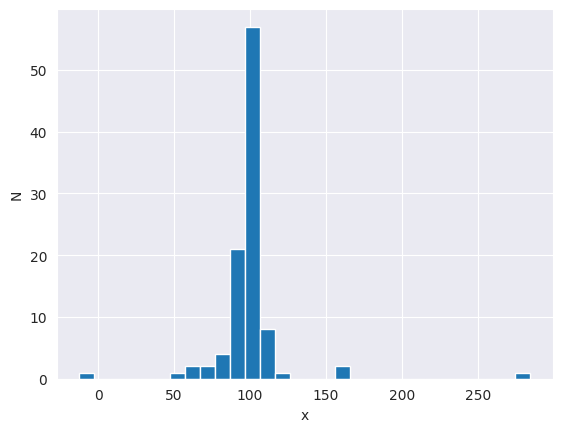

In [302]:
##your code here...
np.random.seed(456)
mydists['cauchy'] = {}
mydists['cauchy'][100] = np.random.standard_cauchy(size=100)
scal=4;
mydists['cauchy'][100]=mydists['cauchy'][100]*(-scal)+100
pl.hist(mydists['cauchy'][100], bins = 30)

pl.ylabel('N');
pl.xlabel('x');

## Figure 1: Histogram of Cauchy distribution. The peak is located at 100 and "standard deviation" of 4. The Cauchy distribution doesn't have a mean and standard deviation in the sense of Gaussian, so the expected mean and "standard deviation" is defined for the data set instead of for the distribution itself.

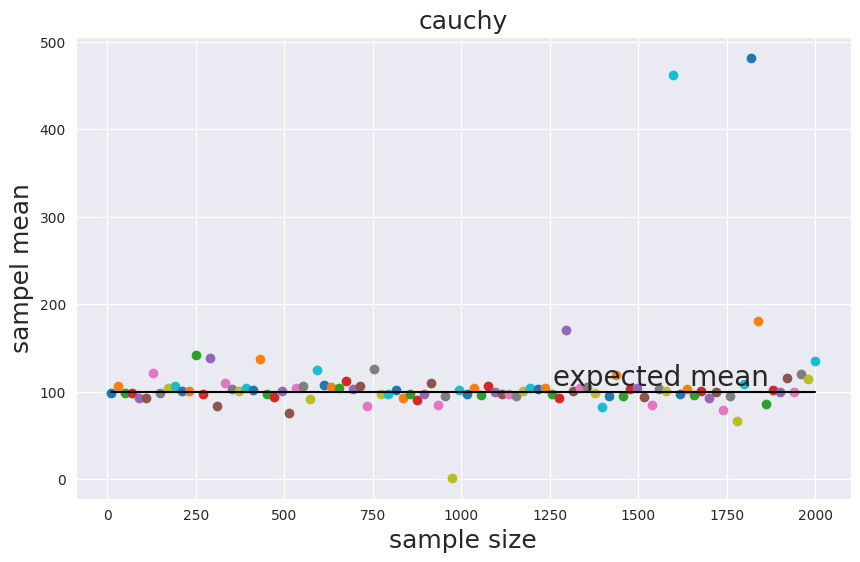

In [303]:
np.random.seed(456)
mydists['cauchy']={}
for n in mysize:
  mydists['cauchy'][n]=np.random.standard_cauchy(size=n)
  mydists['cauchy'][n]=mydists['cauchy'][n]*(-scal)+mymean
axcauchy_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
mydists['cauchy']['means']={}
for nn in mysize:
  mydists['cauchy']['means'][nn]=mydists['cauchy'][nn].mean();
  axcauchy_mu_n.plot(nn,mydists['cauchy']['means'][nn],'o');
axcauchy_mu_n.set_xlabel("sample size",fontsize=18)
axcauchy_mu_n.set_ylabel("sampel mean",fontsize=18)
axcauchy_mu_n.set_title('cauchy', fontsize=18)
axcauchy_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axcauchy_mu_n.text(axcauchy_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

### Figure 2: No apprent conclusive statement can be made about the relation between sample mean from different sample sizes and the mean of the population.

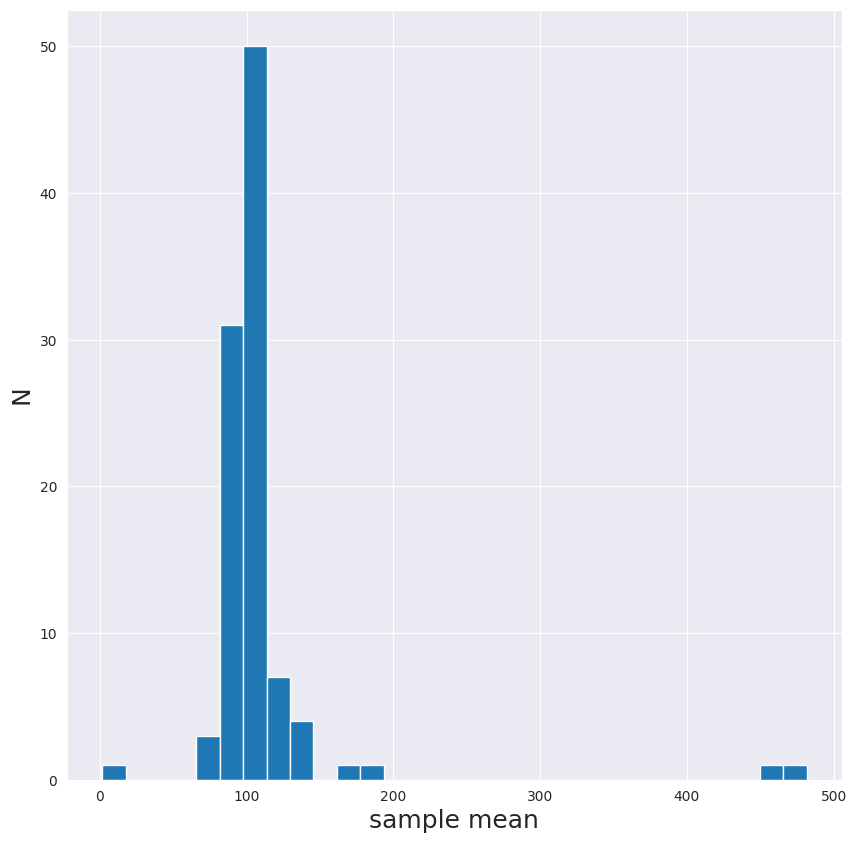

In [304]:
allmeans = list(mydists['cauchy']['means'].values())
allmeans=np.array(allmeans)
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

### Figure 3: Histogram of sample mean.

# 661 students: fita  a Gaussian to the histogram of the means for each distribution

# Extra Credit for 461

to fit a curve to data you can, for example, use scipy.optimize.curve_fit(). Your y value should be the hight of each histogram bin, which you can extract by capturing the output of pl.hist() when you plot the histogram.
(be careful that the x axis and the y axis are not the same size when you extract them from the pl.hist function cause the x represents the **edges** while what you want is the **centers** of each bin

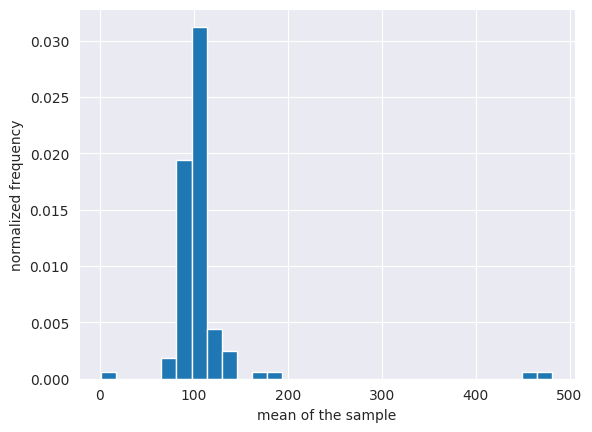

In [305]:
height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");

In [306]:
from scipy.stats import norm

And you can create your own Gaussian function to pass to curve_fit as this for example:

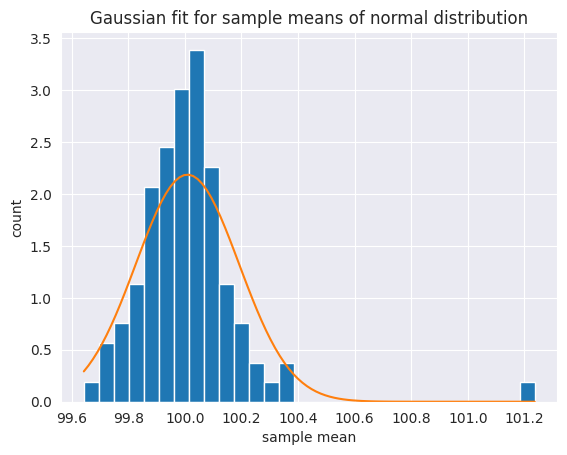

In [307]:
allmeans = list(mydists['normal']['means'].values())
allmeans=np.array(allmeans)
mu,std=norm.fit(allmeans)
x=np.linspace(allmeans.min(),allmeans.max(),100)
gausfit = norm.pdf(x, mu, std)
a,b,c=pl.hist(allmeans,bins=30,density=True)
# gausfit *= a[0]
pl.plot(x,gausfit)
pl.xlabel("sample mean")
pl.ylabel("count")
pl.title("Gaussian fit for sample means of normal distribution")
pl.show()

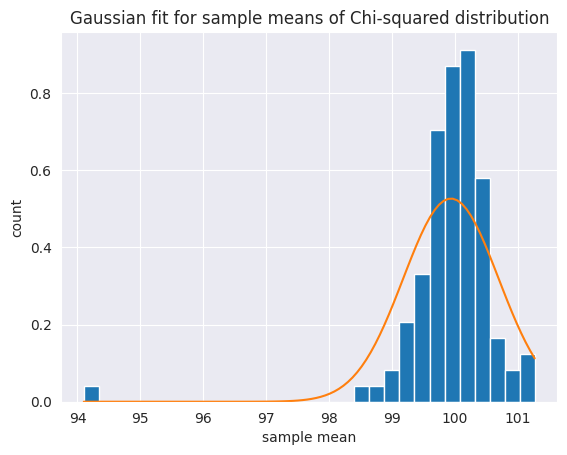

In [308]:
allmeans = list(mydists['chisq']['means'].values())
allmeans=np.array(allmeans)
mu,std=norm.fit(allmeans)
x=np.linspace(allmeans.min(),allmeans.max(),100)
gausfit = norm.pdf(x, mu, std)
a,b,c=pl.hist(allmeans,bins=30,density=True)
# gausfit *= a[0]
pl.plot(x,gausfit)
pl.xlabel("sample mean")
pl.ylabel("count")
pl.title("Gaussian fit for sample means of Chi-squared distribution")
pl.show()

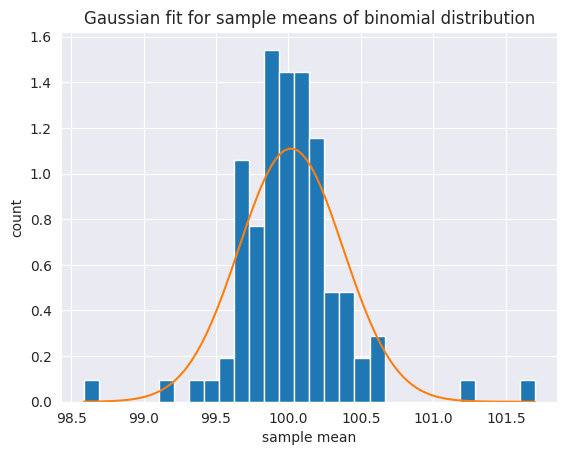

In [309]:
allmeans = list(mydists['binomial']['means'].values())
allmeans=np.array(allmeans)
mu,std=norm.fit(allmeans)
x=np.linspace(allmeans.min(),allmeans.max(),100)
gausfit = norm.pdf(x, mu, std)
a,b,c=pl.hist(allmeans,bins=30,density=True)
# gausfit *= a[0]
pl.plot(x,gausfit)
pl.xlabel("sample mean")
pl.ylabel("count")
pl.title("Gaussian fit for sample means of binomial distribution")
pl.show()

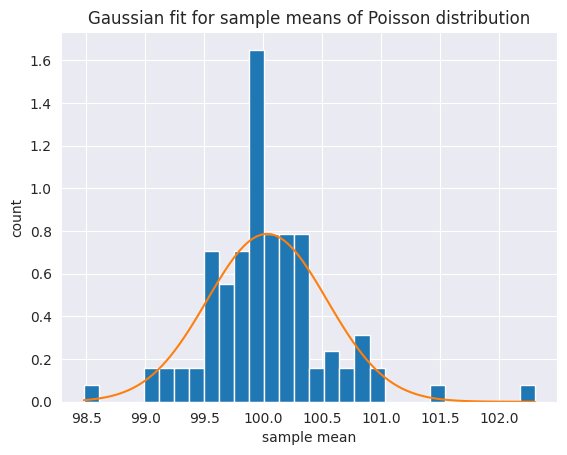

In [310]:
allmeans = list(mydists['pois']['means'].values())
allmeans=np.array(allmeans)
mu,std=norm.fit(allmeans)
x=np.linspace(allmeans.min(),allmeans.max(),100)
gausfit = norm.pdf(x, mu, std)
a,b,c=pl.hist(allmeans,bins=30,density=True)
# gausfit *= a[0]
pl.plot(x,gausfit)
pl.xlabel("sample mean")
pl.ylabel("count")
pl.title("Gaussian fit for sample means of Poisson distribution")
pl.show()

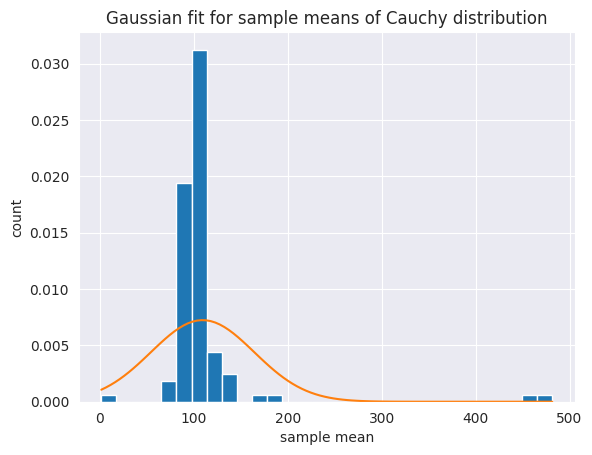

In [311]:
allmeans = list(mydists['cauchy']['means'].values())
allmeans=np.array(allmeans)
mu,std=norm.fit(allmeans)
x=np.linspace(allmeans.min(),allmeans.max(),100)
gausfit = norm.pdf(x, mu, std)
a,b,c=pl.hist(allmeans,bins=30,density=True)
# gausfit *= a[0]
pl.plot(x,gausfit)
pl.xlabel("sample mean")
pl.ylabel("count")
pl.title("Gaussian fit for sample means of Cauchy distribution")
pl.show()

In [312]:
def gaussian(mu, sigma, x): # this is the gaussian you will fit
  g = 1 / np.sqrt(2 * pi) / sigma * np.exp(-(x - mu )**2 / 2/sigma**2)
  return g
  '''
  REMEMBER TO WRITE A DOCSTRING THAT EXPLAINS WHAT A FUNCTION DOES EVERY TIME YOU WRITE A FUNCTION
  https://www.python.org/dev/peps/pep-0257/
  '''
def fun(args, x, hb): # this is the function you will minimize
  ...
  return ... # needs to return a single number representing the "distance" between the heigh of the histogram bins and the gaussian you create

Or you can use existing functions (scipy has one, but it would be instructive for you to write it yourself!)

**You can do it by eye** (partial credit 0.5/1).

It would be better to do it programmatically. To fit the data you can use `scipy.minimize` or `scipy.optimize`

In [313]:
from scipy import optimize
optimize.minimize?
...

Ellipsis

In [314]:
from scipy.stats import norm
norm.fit(allmeans)

(109.33939328511826, 55.0731182445412)

In [315]:
sp.optimize.fmin?

Object `sp.optimize.fmin` not found.


In [316]:
...

Ellipsis